In [29]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

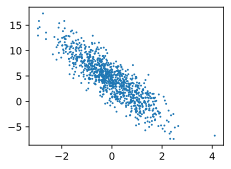

In [30]:
# 生成数据集
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
# print(features,labels)
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

In [31]:
# 读取数据集
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.9280, -0.3795],
        [-1.1443,  0.9762],
        [ 0.7749, -0.3977],
        [-0.0103,  1.0825],
        [ 0.6624, -0.0288],
        [ 0.5341, -1.8802],
        [-0.3900, -0.5207],
        [ 1.8929,  0.3814],
        [ 1.2808, -0.4262],
        [-0.8008, -0.6637]]) 
 tensor([[ 3.6340],
        [-1.4227],
        [ 7.0772],
        [ 0.5045],
        [ 5.6188],
        [11.6596],
        [ 5.2061],
        [ 6.6820],
        [ 8.2103],
        [ 4.8395]])


In [47]:
# 初始化模型参数
# w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
w = torch.zeros((2,1),requires_grad=True).reshape(2,1)
b = torch.zeros(1,requires_grad=True)
print(w,b)
def f(X,w,b):
    '''定义模型'''
    return torch.matmul(X,w)+b

def squared_loss(y_hat,y):
    '''定义损失函数'''
    return (y_hat - y.reshape(y_hat.shape))**2 /2

def sgd(params,lr,batch_size):
    '''定义优化算法:小批量随机梯度下降'''
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad / batch_size 
            param.grad.zero_() # 防止梯度累积
    


tensor([[0.],
        [0.]], grad_fn=<ViewBackward0>) tensor([0.], requires_grad=True)


In [ ]:
lr = 0.03
num_epochs = 3
net = f
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')